In [189]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import boxcox

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [190]:
df = pd.read_csv('nndb_flat_data.csv')
df.columns = map(str.lower,df.columns)
df.head()

,id,foodgroup,shortdescrip,descrip,commonname,mfgname,scientificname,energy_kcal,protein_g,fat_g,...,folate_usrda,niacin_usrda,riboflavin_usrda,thiamin_usrda,calcium_usrda,copper_usrda,magnesium_usrda,phosphorus_usrda,selenium_usrda,zinc_usrda
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


How many Rows and Column Exist in the dataset?

In [191]:
df.shape

(8618, 45)

There are `8618 Rows and 45 Columns ` exists in the dataset.

What is Summary of DataSet?

## Drop Irrelevant Columns From DataSet:

In [192]:
df.drop(["id", "shortdescrip", "descrip", "commonname", "mfgname","scientificname"], axis = 1,inplace=True)

In [193]:
df.describe()

,energy_kcal,protein_g,fat_g,carb_g,sugar_g,fiber_g,vita_mcg,vitb6_mg,vitb12_mcg,vitc_mg,...,folate_usrda,niacin_usrda,riboflavin_usrda,thiamin_usrda,calcium_usrda,copper_usrda,magnesium_usrda,phosphorus_usrda,selenium_usrda,zinc_usrda
count,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,7.925377,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,57.582758,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,0.000000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,2.500000,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,2400.000000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


## Checking MultiCollinearity Among Features:

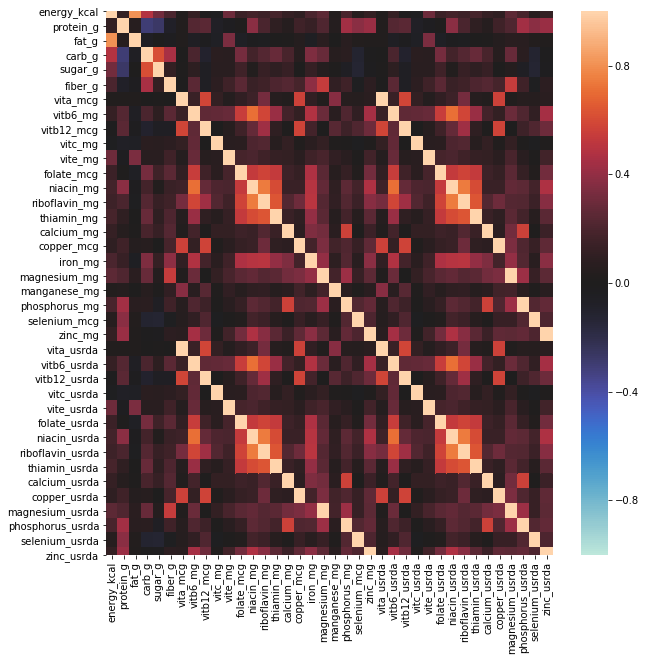

In [194]:
fig, axes = plt.subplots(figsize=(10, 10))
correlate = df.iloc[:, 1:].corr()
sns.heatmap(correlate, vmin=-1, vmax=1, center=0, ax=axes)
plt.show()

## Drop Correlated Features:

In [195]:
count = 0
column_corr = list()
for i in range(0, correlate.shape[0]):
    for j in range(i+1, correlate.shape[0]):
        if(abs(correlate.iloc[i, j]) > 0.6):
            column_corr.append(correlate.columns[i])
            #print(correlate.columns[i] + " -> "+ correlate.columns[j])
            count += 1
            
print("These Columns are Correlated with each other \n" , set(column_corr))

These Columns are Correlated with each other 
 {'calcium_mg', 'riboflavin_mg', 'phosphorus_mg', 'riboflavin_usrda', 'zinc_mg', 'magnesium_mg', 'vite_mg', 'vita_mcg', 'selenium_mcg', 'niacin_usrda', 'folate_mcg', 'copper_mcg', 'vitb6_mg', 'vitb6_usrda', 'thiamin_mg', 'carb_g', 'vitb12_mcg', 'energy_kcal', 'vitc_mg', 'niacin_mg'}


We are Removing 20 Correlated Features from the dataset

In [196]:
df.drop(list(set(column_corr)), axis=1,inplace=True)
df.shape

(8618, 19)

We are checking Skewness of Data by Histogram

C:\Users\Muneer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


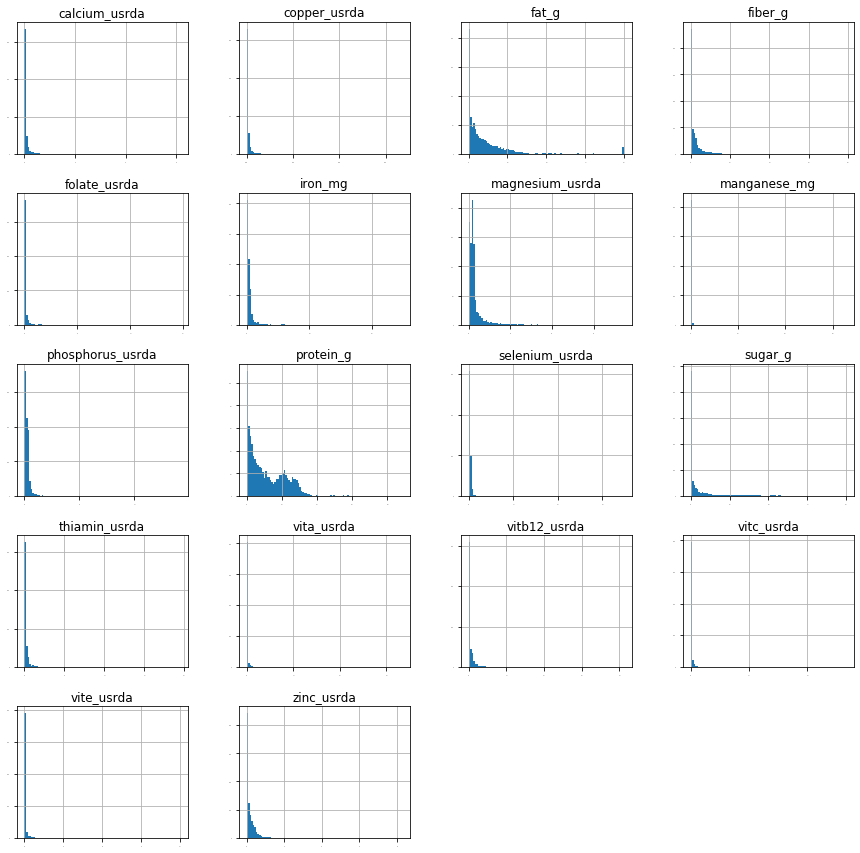

In [197]:
fig, axes = plt.subplots(figsize=(15, 15))
df.iloc[:,1:].hist(bins=100, xlabelsize=0.5, ylabelsize=0.5, ax=axes)
plt.show()

## Replacing NA values

In [198]:
df.fillna(0, inplace=True)

Setting X data and Target Variable

In [122]:
# save the labels to a Pandas series target
y = df.iloc[:,0]

# Get All Numeric Columns except foodgroup Column
X = df.iloc[:,1:]

Make do_PCA function for PCA transformation

In [199]:
def do_pca(n_component,data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.
    
    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform
           
    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_component)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

We are providing only 3  To make 3 Prinicpal Components.

In [200]:
pca, X_pca = do_pca(3,X)

Explain Variance Ratio of 3 Components

In [201]:
pca.explained_variance_ratio_

array([0.20589882, 0.11825986, 0.09837185])

In [202]:
# We are providing only 3  To make 3 Prinicpal Component
pca, X_pca = do_pca(3, X)
X_pca.shape

(8618, 3)

Contribution of All 3 Principle Conponent in All 8618 Rows

In [229]:
X_pca1 = pd.DataFrame(X_pca, index=X.index, columns=["PC1", "PC2", "PC3"])
X_pca1 = X_pca1.join(y)
X_pca1

,PC1,PC2,PC3,foodgroup
0,-1.165744,0.377952,0.590809,Dairy and Egg Products
1,-1.156101,0.376872,0.600553,Dairy and Egg Products
2,-1.174628,0.455665,0.677439,Dairy and Egg Products
3,0.670362,0.271283,-1.532015,Dairy and Egg Products
4,0.976438,0.217515,-1.783609,Dairy and Egg Products
...,...,...,...,...
8613,0.957059,2.008277,-1.058371,Finfish and Shellfish Products
8614,0.013150,0.783658,-1.264995,Finfish and Shellfish Products
8615,-1.143957,-1.550211,2.270872,Sweets
8616,1.441402,-0.209624,-1.002086,Finfish and Shellfish Products


Now We have Variance ratio of every feature/Column in every 3 Prinicples Components to estimate weightage and importance of each feature in Principal Components.

In [204]:
def scree_plot(pca):    
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

## Variance Ratio display by Scree Plot

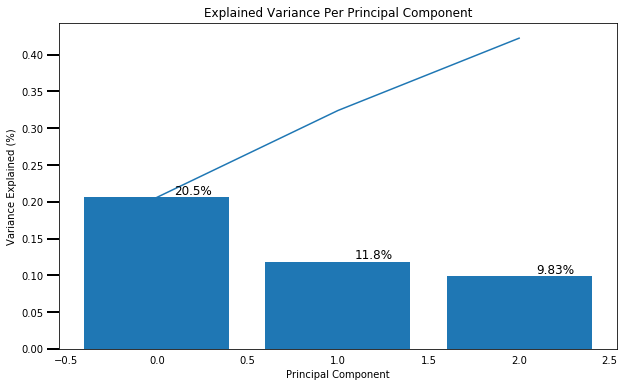

In [205]:
scree_plot(pca)

# Variance Ratio of Every Feature in 3's Principal Component

Two main aspects of principal components are:

1. **The amount of variability captured by the component.**
2. **The components themselves.**


In [206]:
Components = pca.components_
Components = pd.DataFrame(Components, index=["PC1", "PC2", "PC3"], columns=X.columns)

ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'],index=["PC1", "PC2", "PC3"])

pd.concat([variance_ratios, Components], axis = 1).T

,PC1,PC2,PC3
Explained Variance,0.205900,0.118300,0.098400
protein_g,0.207712,0.259987,-0.475079
fat_g,0.035092,0.017298,-0.075273
sugar_g,0.035134,-0.251047,0.298226
fiber_g,0.239508,-0.314225,0.111620
iron_mg,0.346873,-0.216276,0.051288
manganese_mg,0.155248,0.162795,0.245955
vita_usrda,0.197761,0.385197,0.410716
vitb12_usrda,0.248154,0.446692,0.203359
vitc_usrda,0.067679,-0.094536,0.162091


Top 5 Features of princial Component 1 contributing highest Variance

In [225]:
pd.DataFrame(Components.T.sort_values("PC1", axis=0, ascending=False).iloc[:, 0]).head()

,PC1
iron_mg,0.346873
magnesium_usrda,0.343130
zinc_usrda,0.306335
phosphorus_usrda,0.304555
copper_usrda,0.294197


Top 5 Features of princial Component 2 contributing highest Variance

In [222]:
pd.DataFrame(Components.T.sort_values("PC2", axis=0, ascending=False).iloc[:, 1]).head()

,PC2
vitb12_usrda,0.446692
vita_usrda,0.385197
copper_usrda,0.315855
protein_g,0.259987
selenium_usrda,0.228358


Top 5 Features of princial Component 3 contributing highest Variance

In [223]:
pd.DataFrame(Components.T.sort_values("PC3", axis=0, ascending=False).iloc[:, 2]).head()

,PC3
vita_usrda,0.410716
sugar_g,0.298226
manganese_mg,0.245955
copper_usrda,0.219805
vitb12_usrda,0.203359


Top Food Group Categories Contributing in All 3 Principal Components are:

In [243]:
X_pca1.sort_values(by=['PC1','PC2','PC3'], ascending=False)['foodgroup'].value_counts().head()

Beef Products                        946
Vegetables and Vegetable Products    828
Baked Products                       797
Soups, Sauces, and Gravies           452
Lamb, Veal, and Game Products        438
Name: foodgroup, dtype: int64

In [244]:
def pca_results(full_dataset, pca):
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (18,12))

    # Plot the feature weights as a function of the components
    Components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(['PC1','PC2','PC3'], rotation=0)

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))  

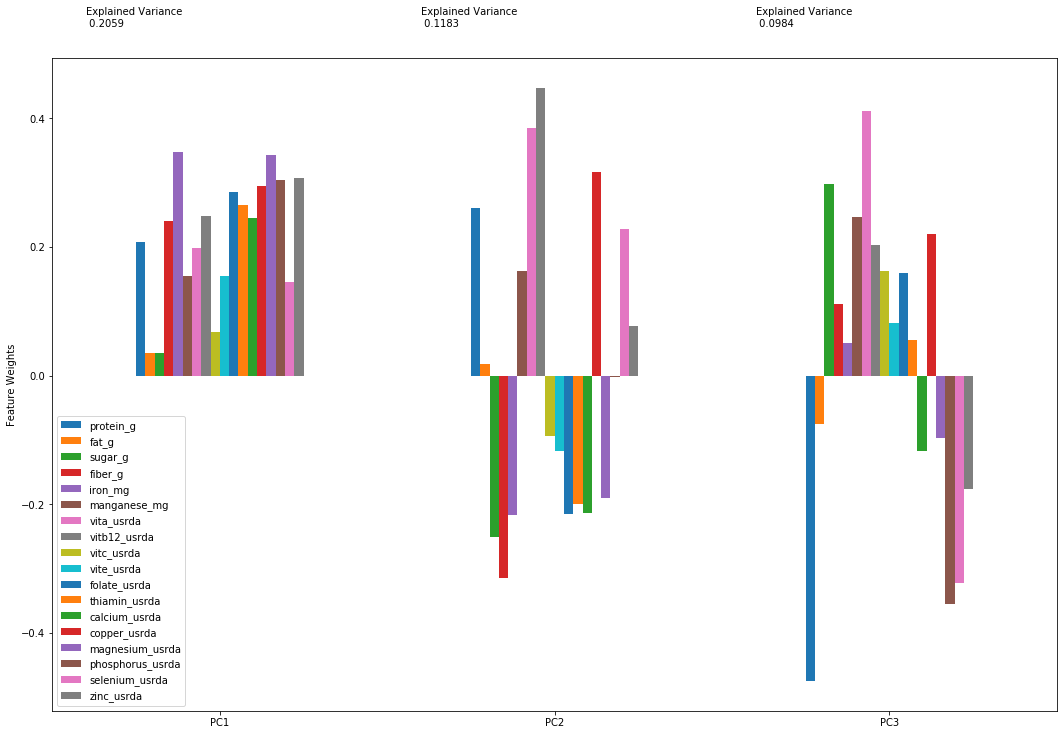

In [245]:
pca_results(X, pca)

Now we will Apply Random Forest Classifier for PCA Demensionality Reduction:

In [246]:
def fit_random_forest_classifier(X, y):
    '''
    INPUT: names are pretty self explanatory
    OUTPUT: none - prints the confusion matrix and accuracy
    '''
    #First let's create training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    #We could grid search and tune, but let's just fit a simple model to see how it does
    #instantiate
    clf = RandomForestClassifier(n_estimators=100, max_depth=None)

    #fit
    clf.fit(X_train, y_train)

    #predict
    y_preds = clf.predict(X_test)

    #score
    print(confusion_matrix(y_test, y_preds))
    acc = accuracy_score(y_test, y_preds)
    print(acc)
    return acc

We will put x_pca with is pca components in place of X

On 3 PCA Components Accuracy is 7% we want 90% Accuracy.So How many PCA Components need to achieve this we will use Random Forest Classifier to see How much Accuracy is improved by how many numbers of Principal Components needed.

In [ ]:
accs = []
comps = []

for comp in range(1, 19):
    pca, X_pca = do_pca(comp, X)
    comps.append(comp)
    acc = fit_random_forest_classifier(X_pca, y)
    accs.append(acc)
    if acc >= .80:
        print("With only {} components, a random forest acheived an accuracy of {}.".format(comp, acc))
        break

[[  1   2   5   3   0   5   1   3   2   1   0   2   0   4   0   1   3   2
    0   2   1   1   1   4   1]
 [  7  21   2   2   4   7   2   3   2   5   2  10   5   4   3   1   2   0
    2   4   1  15   0  10  22]
 [  2   8  42  35   0   4   5  10  10   3   9   7  23  13   3   4   8   9
    5  11   2   5   1   7  26]
 [  6   2  26  98   1   5   4   3  11   3   9   4  27  12   4   2  31  19
    2   7  10   5   0   4   9]
 [  2   3   4   2  45   3   1   2   1   4   1   5   2   1   1   1   1   0
    0   0   0  16   2   2   5]
 [  4   7   4   4   3  22   5   5   1   1   2   1   6  17   0   5   4   1
    1   1   1   0   5   3   5]
 [  1   7   7   8   0   4   5   0   0   0   3   1   2   6   1   1   2   5
    1   1   3   0   1   3   5]
 [  4   3   9  10   3   8   3  12   2   2   1   8   1   2   2   0   4   1
    1   5   3   2   0   4   5]
 [  2   2  13  11   3   0   2   2  14   1   3   5   9   4   2   0   6   7
    3   9   1   2   1   1  14]
 [  1   4   3   1   3   0   1   1   2  27   1   7   0  

[[  5   0   7   6   1   1   0   2   1   1   1   1   4   4   0   0   1   3
    0   0   0   2   1   1   3]
 [  0  71   5   0   1   5   0   0   0   0   0  16   0   3   1   1   0   0
    0   0   0  17   0   1  15]
 [  1   0 206   0   0   6   4   2   7   2   0   1   0   7   4   0   0   0
    0   0   3   0   0   3   6]
 [  0   0   0 271   0   0   0   1   0   0   2   0  20   0   0   0   3   5
    0   2   0   0   0   0   0]
 [  0   5   3   0  59   0   1   2   0   0   0   7   3   3   1   0   0   0
    0   0   0   5   0   8   7]
 [  1   0   4   0   0  88   5   1   0   0   0   1   0   1   0   1   0   0
    0   0   0   0   1   0   5]
 [  3   0   6   0   0   7  36   0   0   0   2   0   0   4   1   1   0   0
    0   1   0   2   0   1   3]
 [  3   0   2   0   1   0   0  60   2   4   0   0   0   4   0   0   0   0
    0   7   0   4   1   2   5]
 [  0   0  17   1   0   0   1   3  69   0   1   1   1   2   0   0   0   3
    1   8   0   2   0   1   6]
 [  0   0   5   0   1   0   0   0   0  62   0   2   0  

Analysis of Accuracy According to PCA Components. By Scree Plot

In [ ]:
plt.plot(comps, accs, 'bo');
plt.xlabel('Number of Components');
plt.ylabel('Accuracy');
plt.title('Number of Components by Accuracy');

In [181]:
# The max accuracy and corresponding number of components
np.max(accs), comps[np.where(accs == np.max(accs))[0][0]]

(0.8002812939521801, 17)

For Achieving 80% Accuracy 17 Principal Component is needed.